Neural Network Training
========================
To understand what Tensorflow is doing when training a model, let's first recall what we did for logistic regression:
1. We defined a model: specified how to compute output and the parameters of the model -> f_x = sigmoid(Wx + b)
2. Specified a loss and cost function: for a single example and the whole dataset, respectively -> L(y, y_hat) = -y*log(y_hat) - (1-y)*log(1-y_hat)
3. Defined an optimization algorithm to train the model: to minimize the cost function -> Gradient Descent

The same steps apply to neural networks:
1. model = Sequential([
                        Dense(...),
                        Dense(...),
                        ...])
2. The loss function: binary cross entropy -> model.compile()
3. Train the model: model.fit()

Note: The binary cross-entropy loss function is defined as:
        L(y, y_hat) = -y*log(y_hat) - (1-y)*log(1-y_hat)
      where y_hat is the output of the model and y is the true label.
      This loss function is used for binary classification problems.
      As you can see, it's the same as the logistic loss function.
      
Note2: When calling model.fit(), the model is trained using the backpropagation algorithm. This algorithm computes the gradient of the loss function with respect to the model's parameters and updates the parameters in the opposite direction of the gradient to minimize the loss function. In other words, it's a generalization of the gradient descent algorithm to neural networks.

Activation Functions
=====================
1. ReLU (Rectified Linear Unit): g(z) = max(0, z)
2. Sigmoid: g(z) = 1 / (1 + exp(-z))
3. Linear Activation: g(z) = z -> same as no activation function

Choosing the Right Activation Function
======================================
Output Layers:
1. Binary Classification: Sigmoid -> y = 1 OR 0
2. Regression: Linear activation function -> y can be any real number
3. Regression 2: ReLU -> y can be any non-negative number
Hidden Layers:
- Most commonly used activation function: ReLU
- Why not sigmoid? 1. the computation for ReLU is much faster than sigmoid, 2. the vanishing gradient problem
- The vanishing gradient problem: the gradient of the sigmoid function is close to zero for most of its input range, which can slow down the training process. It is flat for large positive and negative values.

Why do we need activation functions?
=====================================
- Without activation functions, a neural network is just a linear regression model.
- Activation functions introduce non-linearity to the model, which allows it to learn complex patterns in the data.

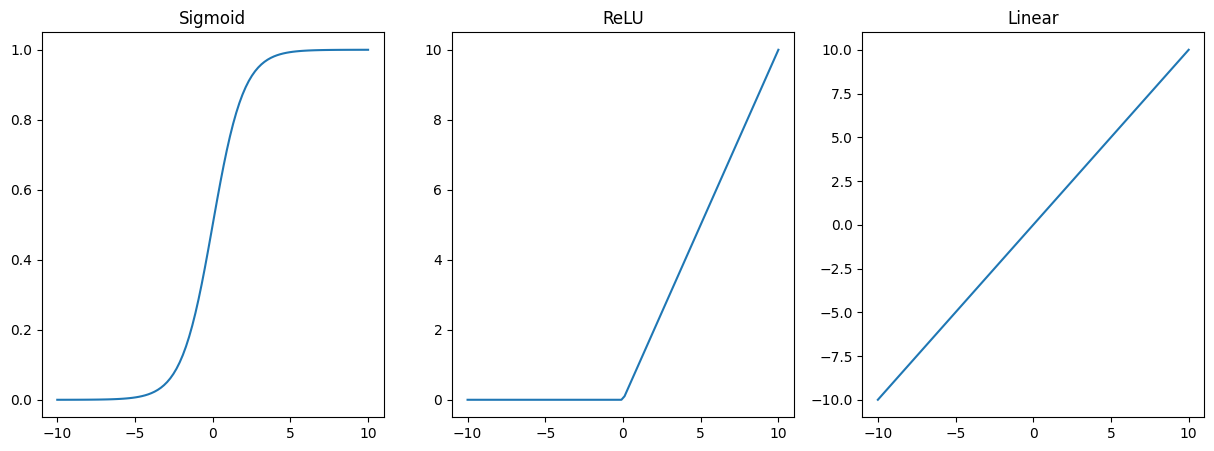

In [2]:
# plot the three activation functions
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def linear(z):
    return z


z = np.linspace(-10, 10, 100)
# subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(z, sigmoid(z))
ax[0].set_title('Sigmoid')
ax[1].plot(z, relu(z))
ax[1].set_title('ReLU')
ax[2].plot(z, linear(z))
ax[2].set_title('Linear')
plt.show()

The 'flat' or 'off' part in ReLU makes it a non-linear activation function.
So why use non-linear activation functions?

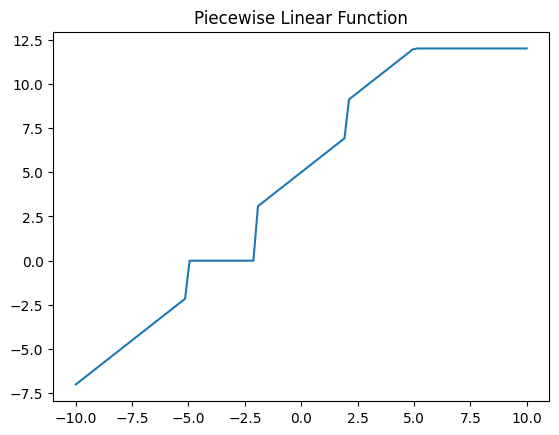

In [3]:
# plot a piecewise linear function
x = np.linspace(-10, 10, 100)
y = np.piecewise(x, [x < -5, x >= -2, x >= 2, x >= 5], [lambda x: x + 3, lambda x: x + 5, lambda x: x + 7, lambda x: 12])
plt.plot(x, y)
plt.title('Piecewise Linear Function')
plt.show()

Suppose a piecewise linear function, where the slope is constant for each piece, and abrupt changes at each transition point.
At these transition points, a new linear function is added, producing the new slope.
So, the new function doesn't contribute to the output prior to the transition point.
The non-linear activation function is responsible for disabling the input prior to and sometimes after the transition points.

ReLU's non-linear behavior provides the ability to turn functions off until they are needed.
The "off" or disable feature of the ReLU activation enables models to stitch together linear segments to model complex non-linear functions.

Multiclass Classification
=========================
Softmax Regression algorithm: It's a generalization of logistic regression to multiple classes.

Recall that the logistic regression model is defined as:
    a_1 = sigmoid(W.x + b) = P(y=1|x)
    a_0 = 1 - a_1 = P(y=0|x)
    where a_1 is the probability that the output is 1 given the input x.
    
The softmax regression model (for 3 classes) is defined as:
    z_1 = W_1.x + b_1
    z_2 = W_2.x + b_2
    z_3 = W_3.x + b_3
    
    a_1 = exp(z_1) / (exp(z_1) + exp(z_2) + exp(z_3)) = P(y=1|x)
    a_2 = exp(z_2) / (exp(z_1) + exp(z_2) + exp(z_3)) = P(y=2|x)
    a_3 = exp(z_3) / (exp(z_1) + exp(z_2) + exp(z_3)) = P(y=3|x)
    
    where a_1, a_2, and a_3 are the probabilities that the output is 1, 2, and 3 given the input x.
    
So the general formula for the softmax function is:
    a_i = exp(z_i) / (exp(z_1) + exp(z_2) + ... + exp(z_n)) = P(y=i|x)
    such that: a_1 + a_2 + ... + a_n = 1
    
Note that the softmax function with two classes is reduced to logistic regression.

The loss function for softmax regression is the cross-entropy loss function:
    loss(a_1, ... a_n, y) = -log(a_i) if y = i
    
In Tensorflow, the loss function for multiclass classification is called 'sparse_categorical_crossentropy'.
The 'categorical' part refers to y being classically encoded.
The 'sparse' part means that y can take only one value from 0 to n-1.
Recall that the loss function for binary classification is called 'binary_crossentropy'.

Neural Network with Softmax output
==================================
The softmax function is used in the output layer of a neural network for multiclass classification problems.
The number of units in the output layer is equal to the number of classes in the dataset.
The activation function of the output layer is softmax.
The forward propagation for the output layer is then computed as:
    z = W.x + b
    a = softmax(z)
    where a is the output of the model.
    
What makes softmax different from other activation functions is that it's a function over z_1, z_2, ..., z_n, not just z.

But wait! There's an improved implementation of softmax. Read on.

Improved Implementation of Softmax
==================================
Numerical Round-off Error: Consider this example of representing 2/10000
1. x1 = 2.0 / 10000
2. x2 = 1 + 1/10000 - (1 - 1/10000)

In [19]:
x1 = 2.0 / 10000
x2 = 1 + 1/10000 - (1 - 1/10000)
print(x1, x2)

0.0002 0.00019999999999997797


X2 seems a bit off. Because of the limited precision of floating-point numbers, the subtraction operation can lead to a loss of precision.

It seems that there's a better implementation of softmax that reduces the risk of numerical round-off errors.
Let's first look more closely at logistic regression.

Recall that the loss function for logistic regression is written as:
    L(y, y_hat) = -y*log(y_hat) - (1-y)*log(1-y_hat)
    
By substituting the sigmoid function for y_hat, we get:
    L(y, a) = -y*log(1/(1+exp(-z))) - (1-y)*log(1 - 1/(1+exp(-z)))

It turns out that by rewriting the loss function this way, Tensorflow can compute the output more efficiently.
In this case the code becomes:

model = Sequential([
    Dense(...,  activation='relu'),
    Dense(..., activation='relu'),
    Dense(..., activation='sigmoid'),   -> Dense(..., activation='linear'), 
])
model.compile(loss=BinaryCrossEntropy())   -> model.compile(loss=BinaryCrossEntropy(from_logits=True))

The term 'logit' refers to 'z' in the softmax function.

For logistic regression, both implementations work ok.
But for softmax, the numerical round-off errors can be significant.

The same story goes for softmax.

loss(a, y) = -log(a_i) if y = i
becomes:
loss(a, y) = -log(exp(z_i) / (exp(z_1) + exp(z_2) + ... + exp(z_n))) if y = i

And in code:
model = Sequential([
    Dense(...,  activation='relu'),
    Dense(..., activation='relu'),
    Dense(..., activation='softmax'),   -> Dense(..., activation='linear'), 
])
model.compile(loss=SparseCategoricalCrossEntropy())   -> model.compile(loss=SparseCategoricalCrossEntropy(from_logits=True))

There remains just one more detail for the improved implementation of softmax.
Because now the final layer is just a linear layer, the output of the model for logistic regression must be passed through the sigmoid function.
Also for softmax, the output of the model is not a_1 to a_n, but z_1 to z_n.

Multi-label Classification
===========================
Sometimes the output is a vector, for example we might input an image, and ask the model to predict the objects in the image.
- is there a cat in the image? yes or no
- is there a dog in the image? yes or no
- is there a car in the image? yes or no
So the output in this cas is a vector of length 3: [1, 0, 1] -> yes, no, yes

You can just train three separate models, but this is not efficient.
Instead, you can use a single model with a vector as output.
Because we're solving three binary classification problems, we can use the sigmoid activation function.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# generate a synthetic dataset
X, y = make_classification(n_samples=3000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=3, random_state=42)

# Create a DataFrame
df = pd.DataFrame(X, columns=['Variable1', 'Variable2'])
df['Target'] = y

# Display the first few rows of the dataset
print(df.head())

   Variable1  Variable2  Target
0   0.177328   0.275889       0
1  -1.272075   0.087897       2
2  -0.678115   1.918191       2
3   1.506737  -1.423953       0
4   0.687632   0.720722       1


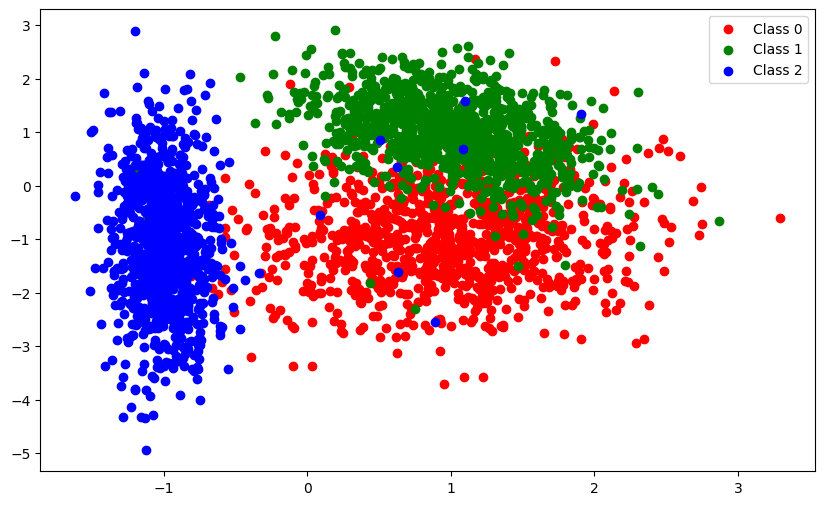

In [4]:
# plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='r', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='g', label='Class 1')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='b', label='Class 2')
plt.legend()
plt.show()

In [5]:
tf.random.set_seed(42)
model = Sequential([
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5511 - loss: 0.9954 - val_accuracy: 0.8450 - val_loss: 0.7673
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8720 - loss: 0.6969 - val_accuracy: 0.9083 - val_loss: 0.4846
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9023 - loss: 0.4325 - val_accuracy: 0.9100 - val_loss: 0.3219
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9086 - loss: 0.3066 - val_accuracy: 0.9117 - val_loss: 0.2713
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9118 - loss: 0.2712 - val_accuracy: 0.9150 - val_loss: 0.2544
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9135 - loss: 0.2597 - val_accuracy: 0.9167 - val_loss: 0.2467
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9130 - loss: 0.2544 - val_accuracy: 0.9183 - val_loss: 0.2423
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9141 - loss: 0.2514 - val_accuracy: 0.9183 - val_loss:

In [8]:
# Evaluate the model
model.evaluate(X, y)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9228 - loss: 0.2369


[0.23977050185203552, 0.9193333387374878]

21270/21270 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step


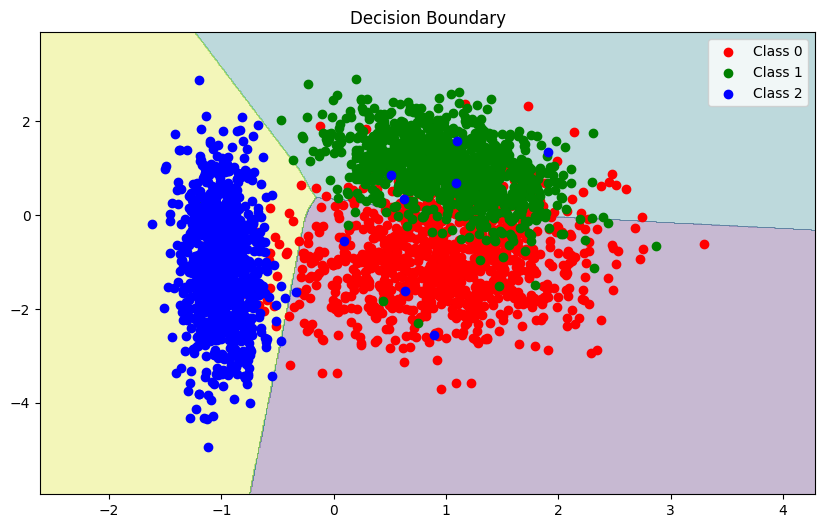

In [10]:
# plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).argmax(axis=1)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='r', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='g', label='Class 1')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='b', label='Class 2')
plt.title('Decision Boundary')
plt.legend()
plt.show()